In [108]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
%autoreload 2

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.models.predict_model import KNN, Node

In [111]:
datafile = "../data/processed/bc.csv"
df = pd.read_csv(datafile, index_col="Sample")

In [112]:
np.random.seed(42)

In [113]:
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [114]:
x_cols = train.columns[:-1]
y_cols = train.columns[-1:]

# Part 1

Implement a $k$-nearest-neighbors algorithm to predict whether data indicate a malignant or benign tumor. Run your algorithm with $k$ values $2$ to $8$, $17$, and $33$, and use cross-validation to determine the best $k$. Report the performance (confusion matrix, accuracy, etc.) on the training and validation data for each $k$, and the performance on the test data for the optimal $k$.

In [115]:
xtr = train[x_cols].values
ytr = train[y_cols].values.ravel()

In [116]:
n_list = [2, 3, 4, 5, 6, 7, 8, 17, 33]

In [117]:
knns = [KNN(n=n).fit(xtr, ytr) for n in n_list]

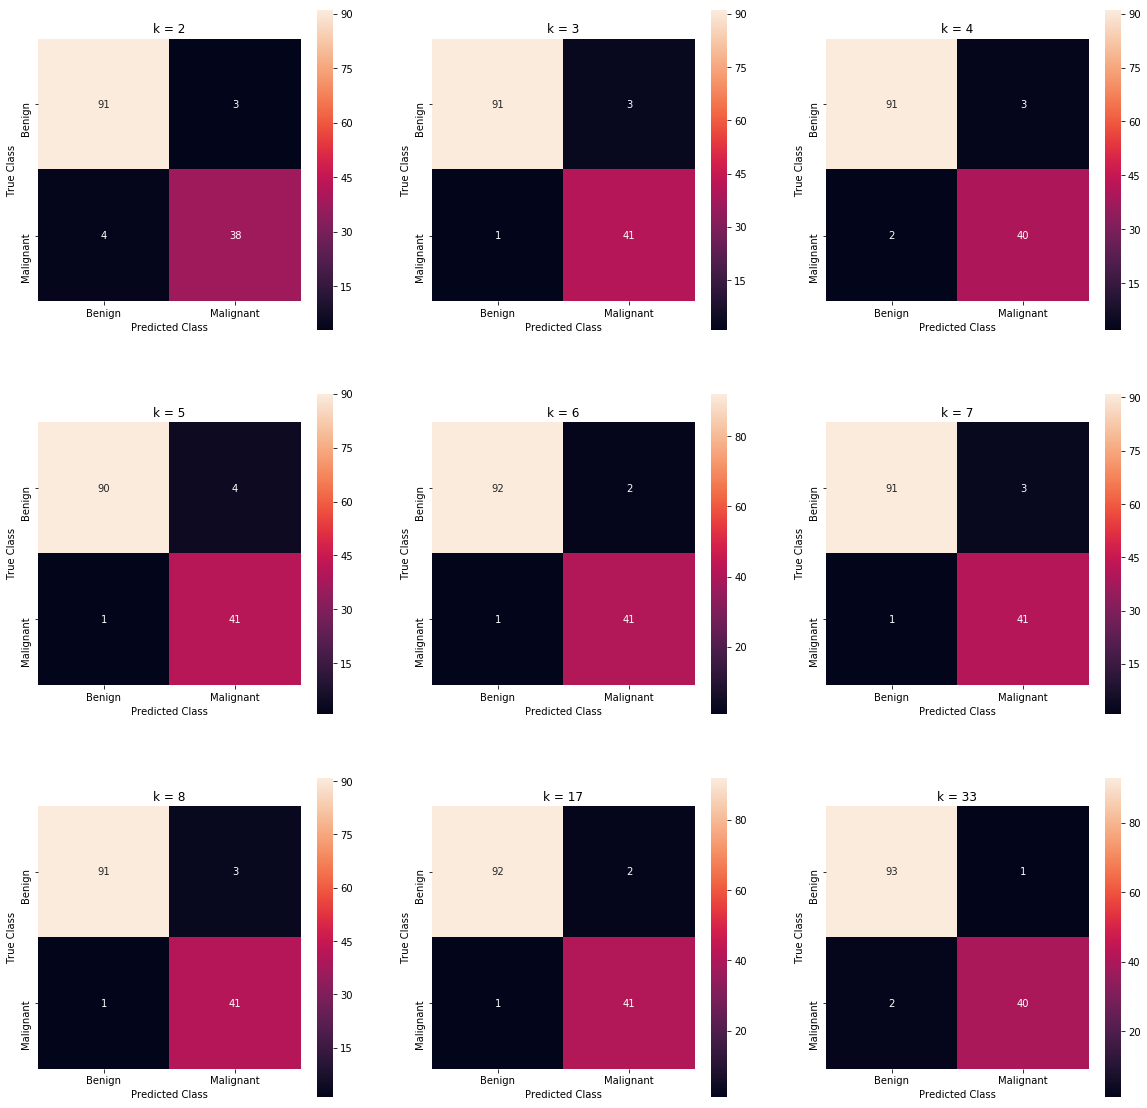

In [118]:
xv = validate[validate.columns[:-1]].values
yv = validate[validate.columns[-1]].values
f = plt.figure(figsize=(20,20))
for k in range(len(n_list)):
    n = n_list[k]
    knn = KNN(n=n).fit(x, y)
    f.add_subplot(3, 3, k+1)
    sns.heatmap(knn.confusion(xv, yv), annot=True, square=True, fmt='g',
                xticklabels=["Benign", "Malignant"],
                yticklabels=["Benign", "Malignant"])
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.title(f"k = {n}")

In [120]:
pd.options.display.float_format = '{:,.2f}'.format
res_table = pd.DataFrame({
    "k": n_list,
    "Accuracy": [k.accuracy(xv, yv) for k in knns],
    "True Positive Rate": [k.tpr(xv, yv) for k in knns],
    "Precision": [k.ppv(xv, yv) for k in knns],
    "Specificity": [k.tnr(xv, yv) for k in knns],
    "F1 Score": [k.f1_score(xv, yv) for k in knns]
})

In [121]:
res_table

,k,Accuracy,True Positive Rate,Precision,Specificity,F1 Score
0,2,0.95,0.90,0.93,0.97,0.92
1,3,0.97,0.98,0.93,0.97,0.95
2,4,0.96,0.95,0.93,0.97,0.94
3,5,0.96,0.98,0.91,0.96,0.94
4,6,0.98,0.98,0.95,0.98,0.96
5,7,0.97,0.98,0.93,0.97,0.95
6,8,0.97,0.98,0.93,0.97,0.95
7,17,0.98,0.98,0.95,0.98,0.96
8,33,0.98,0.95,0.98,0.99,0.96


Based on the results in the table above and the confusion matrix, a $k$ of 6 produces the best model.

In [122]:
best_knn = KNN(n=6).fit(xtr, ytr)

In [123]:
xts = test[test.columns[:-1]]
yts = test[test.columns[-1]]

In [131]:
print("Selected Model Performance")
print("----------------------------")
print(f"Accuracy\t\t{best_knn.accuracy(xts, yts):0.2f}")
print(f"True Positive Rate\t{best_knn.tpr(xts, yts):0.2f}")
print(f"Precision\t\t{best_knn.ppv(xts, yts):0.2f}")
print(f"Specificity\t\t{best_knn.tnr(xts, yts):0.2f}")
print(f"F1 Score\t\t{best_knn.f1_score(xts, yts):0.2f}")

Selected Model Performance
----------------------------
Accuracy		0.96
True Positive Rate	0.94
Precision		0.96
Specificity		0.98
F1 Score		0.95
